# Fitting a robust Linear Regression model using RANSAC algorithm 

<img src = "ransac.png">

In this notebook, Ransac algorithm is used to fit 4 different regression models on 4 different datasets

In [63]:
## Importing Dependencies
import numpy as np               # For matrix operations
import sklearn.metrics           # For evaluating the performance of our model
import sklearn.model_selection   # For splitting the dataset into train and test set
import sklearn.datasets          # For creating and importing datasets
import sklearn.linear_model      # To train our model
import matplotlib.pyplot as plt  # Data Visualization

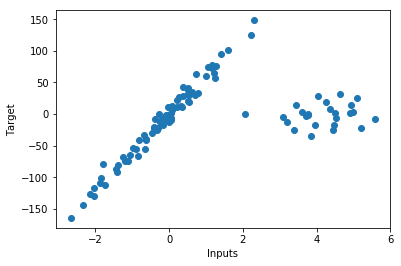

In [68]:
## Dataset - 1

X, y, true_coef = sklearn.datasets.make_regression(n_samples = 100, n_features = 1, noise = 10, coef = True, random_state = 2)
y = y.reshape((-1,1))

# Adding noise to the data
n_outliers = 25
mu_x = 4
sigma_x = 1
X[:n_outliers] = np.random.normal(mu_x, sigma_x, size = (n_outliers, 1))

mu_y = 0
sigma_y = 15
y[:n_outliers] = np.random.normal(mu_y, sigma_y, size = (n_outliers, 1))

# Visualizing data
plt.scatter(X, y)
plt.xlabel("Inputs")
plt.ylabel("Target")
plt.show()

## Training our models for regression dataset 

True coefficients:: 60.84421578050496
Coefficients obtained from RANSACRegressor:: 60.12975458891597
Intercept obtained from RANSACRegressor:: 0.5544987469509639


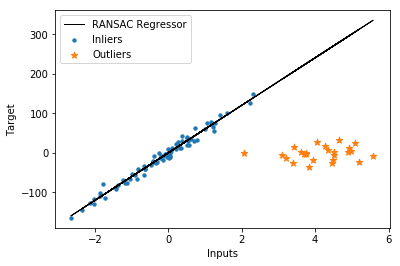

In [73]:
## RANSAC Algorithm
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(X,y)

# Getting indeces of outlier/noisy data
inliers = ransac.inlier_mask_
outliers = np.logical_not(inliers)

# Data Visualization
plt.scatter(X[inliers], y[inliers], s = 45, marker = '.', label = 'Inliers')
plt.scatter(X[outliers], y[outliers], s = 45, marker = '*', label = 'Outliers')

# Coefficients
print("True coefficients::", true_coef)
print("Coefficients obtained from RANSACRegressor::", ransac.estimator_.coef_[0,0])
print("Intercept obtained from RANSACRegressor::", ransac.estimator_.intercept_[0])

# Predictions
predict = ransac.predict(X)

# Plotting our trained model
plt.plot(X, predict, linewidth = 1, label = "RANSAC Regressor", color = 'k')

plt.xlabel("Inputs")
plt.ylabel("Target")
plt.legend(loc ='best')
plt.show()


True coefficients::  60.84421578050496
Coefficients obtained from Linear Regression model:: 12.774674566652587
Intercept obtained from Linear Regression model:: -19.477676578603287


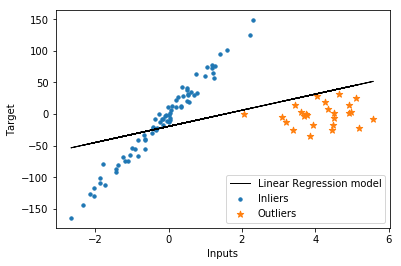

In [74]:
## Linear Regression model

regr = sklearn.linear_model.LinearRegression()
regr.fit(X,y)

# Coefficients
print("True coefficients:: ", true_coef)
print("Coefficients obtained from Linear Regression model::", regr.coef_[0,0])
print("Intercept obtained from Linear Regression model::", regr.intercept_[0])


# Data Visualization
plt.scatter(X[inliers], y[inliers], s = 45, marker = '.', label = 'Inliers')
plt.scatter(X[outliers], y[outliers], s = 45, marker = '*', label = 'Outliers')

# Predictions
predict = regr.predict(X)

# Plotting our trained model
plt.plot(X, predict, linewidth = 1, label = "Linear Regression model", color = 'k')

plt.xlabel("Inputs")
plt.ylabel("Target")
plt.legend(loc ='best')
plt.show()

*Conclusion*::
**RANSAC model** wins over Standard Linear Regression model on the **first** dataset

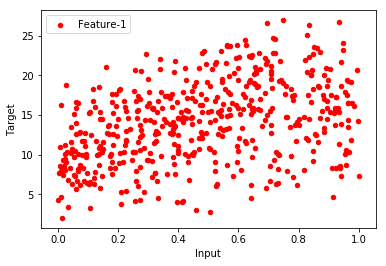

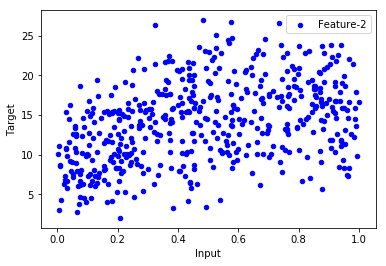

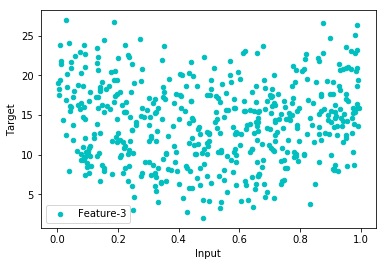

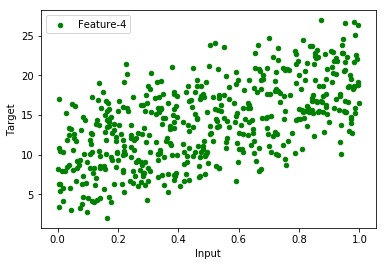

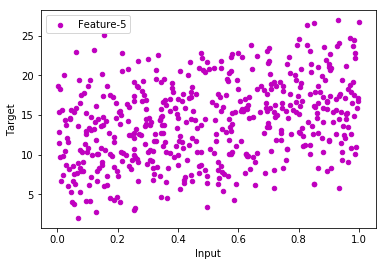

In [115]:
## Dataset - 2
X, y = sklearn.datasets.make_friedman1(n_samples = 500, n_features = 5, random_state = 2, noise = 0)
y = y.reshape((-1,1))

# Visualizing data
plt.scatter(X[:,0].reshape((-1,1)), y, color = 'r', s = 20, label = 'Feature-1')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,1].reshape((-1,1)), y, color = 'b', s = 20, label = 'Feature-2')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,2].reshape((-1,1)), y, color = 'c', s = 20, label = 'Feature-3')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,3].reshape((-1,1)), y, color = 'g', s = 20, label = 'Feature-4')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,4].reshape((-1,1)), y, color = 'm', s = 20, label = 'Feature-5')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

# Splitting the dataset into Train and Test sets

Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, random_state = 3)

## Training linear models for friedman-1 dataset

In [116]:
## Ransac Regressor
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(Xtrain, ytrain)

# Coefficients
print("Coefficients obtained from Ransac model::", ransac.estimator_.coef_[0,0])
print("Intercept obtained from Ransac model::", ransac.estimator_.intercept_[0])

# Predictions
predict = ransac.predict(Xtest)

# Evaluating RMSE 
print("\n\nRoot Mean Squared Error::", np.sum((ytest-predict)**2)/ytest.size )

Coefficients obtained from Ransac model:: 8.68935296637442
Intercept obtained from Ransac model:: -1.863475553641189


Root Mean Squared Error:: 6.159206016876916


In [117]:
## Standard Linear Regression
regr = sklearn.linear_model.LinearRegression()
regr.fit(Xtrain,ytrain)

# Coefficients
print("Coefficients obtained from standard linear regression model:: ", regr.coef_[0,0])
print("Intercept obtained from standard linear regression model:: ", regr.intercept_[0])

# Predictions
predict = regr.predict(Xtest)

# Evaluating RMSE
print('\n\nRoot Mean Squared Error::', np.sum((ytest-predict)**2)/ytest.size )

Coefficients obtained from standard linear regression model::  6.43729872996042
Intercept obtained from standard linear regression model::  -0.34063782104715123


Root Mean Squared Error:: 6.099740792363599


*Conclusion*::
**Standard Linear Regression model** wins over RANSAC model on the **second** dataset

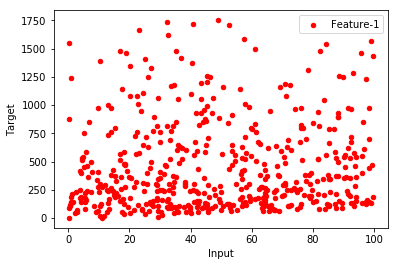

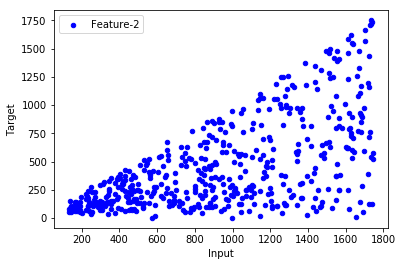

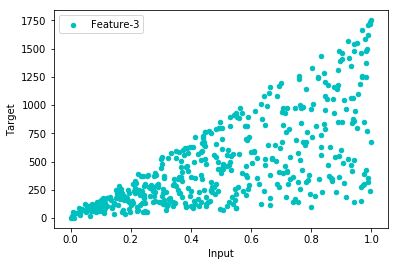

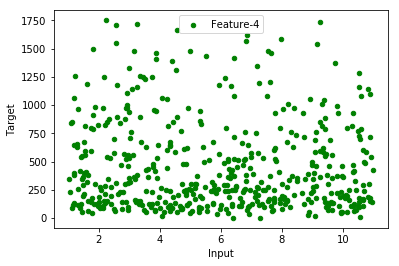

In [129]:
## Dataset - 3
X, y = sklearn.datasets.make_friedman2(n_samples = 500, random_state = 2, noise = 10)
y = y.reshape((-1,1))

# Visualizing data
plt.scatter(X[:,0].reshape((-1,1)), y, color = 'r', s = 20, label = 'Feature-1')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,1].reshape((-1,1)), y, color = 'b', s = 20, label = 'Feature-2')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,2].reshape((-1,1)), y, color = 'c', s = 20, label = 'Feature-3')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,3].reshape((-1,1)), y, color = 'g', s = 20, label = 'Feature-4')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

# Splitting the dataset into Train and Test sets

Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, random_state = 3)

## Training linear models for friedman-2 dataset

In [130]:
## Ransac Regressor
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(Xtrain, ytrain)

# Coefficients
print("Coefficients obtained from Ransac model::", ransac.estimator_.coef_[0,0])
print("Intercept obtained from Ransac model::", ransac.estimator_.intercept_[0])

# Predictions
predict = ransac.predict(Xtest)

# Evaluating RMSE 
print("\n\nRoot Mean Squared Error::", np.sum((ytest-predict)**2)/ytest.size )

Coefficients obtained from Ransac model:: 0.29724688608902555
Intercept obtained from Ransac model:: -221.1221459478487


Root Mean Squared Error:: 38013.92558539927


In [131]:
## Standard Linear Regression
regr = sklearn.linear_model.LinearRegression()
regr.fit(Xtrain,ytrain)

# Coefficients
print("Coefficients obtained from standard linear regression model:: ", regr.coef_[0,0])
print("Intercept obtained from standard linear regression model:: ", regr.intercept_[0])

# Predictions
predict = regr.predict(Xtest)

# Evaluating RMSE
print('\n\nRoot Mean Squared Error::', np.sum((ytest-predict)**2)/ytest.size )

Coefficients obtained from standard linear regression model::  0.40641336196133604
Intercept obtained from standard linear regression model::  -453.3472180971453


Root Mean Squared Error:: 16589.888265891255


*Conclusion*::
**Standard Linear Regression model** wins over RANSAC model on the **third** dataset

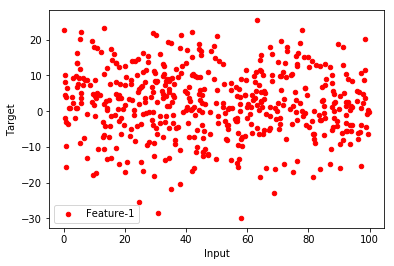

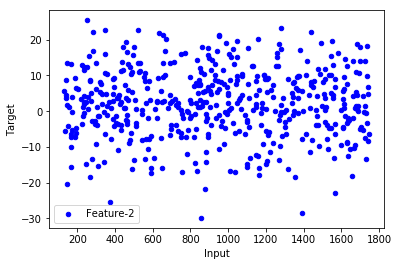

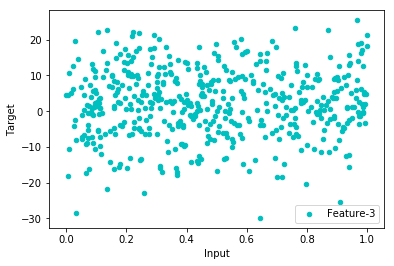

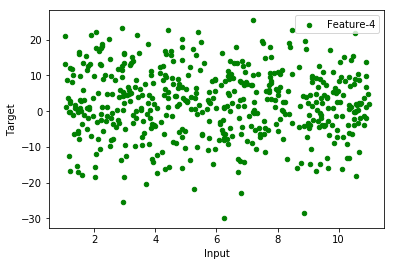

In [132]:
## Dataset - 4
X, y = sklearn.datasets.make_friedman3(n_samples = 500, random_state = 2, noise = 10)
y = y.reshape((-1,1))

# Visualizing data
plt.scatter(X[:,0].reshape((-1,1)), y, color = 'r', s = 20, label = 'Feature-1')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,1].reshape((-1,1)), y, color = 'b', s = 20, label = 'Feature-2')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,2].reshape((-1,1)), y, color = 'c', s = 20, label = 'Feature-3')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

plt.scatter(X[:,3].reshape((-1,1)), y, color = 'g', s = 20, label = 'Feature-4')
plt.legend(loc = 'best')
plt.ylabel('Target')
plt.xlabel("Input")
plt.show()

# Splitting the dataset into Train and Test sets

Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, random_state = 3)

## Training linear models for friedman-3 dataset

In [133]:
## Ransac Regressor
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(Xtrain, ytrain)

# Coefficients
print("Coefficients obtained from Ransac model::", ransac.estimator_.coef_[0,0])
print("Intercept obtained from Ransac model::", ransac.estimator_.intercept_[0])

# Predictions
predict = ransac.predict(Xtest)

# Evaluating RMSE 
print("\n\nRoot Mean Squared Error::", np.sum((ytest-predict)**2)/ytest.size )

Coefficients obtained from Ransac model:: -0.06380260127393711
Intercept obtained from Ransac model:: 9.507276090390324


Root Mean Squared Error:: 116.03420552140857


In [134]:
## Standard Linear Regression
regr = sklearn.linear_model.LinearRegression()
regr.fit(Xtrain,ytrain)

# Coefficients
print("Coefficients obtained from standard linear regression model:: ", regr.coef_[0,0])
print("Intercept obtained from standard linear regression model:: ", regr.intercept_[0])

# Predictions
predict = regr.predict(Xtest)

# Evaluating RMSE
print('\n\nRoot Mean Squared Error::', np.sum((ytest-predict)**2)/ytest.size )

Coefficients obtained from standard linear regression model::  -0.02001749616377558
Intercept obtained from standard linear regression model::  3.6023950553789392


Root Mean Squared Error:: 90.82584222795221


*Conclusion*::
**Standard Linear Regression model** wins over RANSAC model on the **fourth** dataset too!!!!

### Standard Linear Regression Model performed better than RANSAC on 3 datasets

``~Nikhil Chigali``